# Ames - Housing Prices

<img src="./City.png" />

I denne notebooken bruker vi plotly med seaborn og matplotlib for visualisering og maskinlæringsalgoritmer for å forutse husprisene i Ames, Iowa - USA. Arbeidet fra denne notebooken inngår som innlevering til maskinlæring i DAT158. For å utføre oppgaven følger vi de åtte stegene som blir presentert i "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow" kapittel 2. 

### Informasjon
***Fag:*** Maskinlæring og videregående algoritmer
<br>
***Fag-kode:*** DAT158
<br>
***Deltakere:*** Simen Østensen og Sebastian Berge
<br>
***Gruppenavn på Kaggle:*** SimBer
<br>
***Link til kaggle-konkurranse:*** https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
<br>
***Github-repo:*** https://github.com/sebastianberge/ames-housing-prices

### Innhold
1. [Import av pakker og data](#import)
2. [Visualisering av data](#visualisering)
3. [Håndtering av manglende data](#mangler)
4. [Normalitet og transformasjon av distribusjoner](#normalitet)
5. [Feature Enginering](#feature)
6. [Maskinlæring](#maskinlæring)
7. [Resultater](#resultater)

## Oppgaven
I denne opppgaven skal vi lage en modell for husprisene i Ames, Iowa - USA. Datasettet inneholder verdier som for eksempel kvaliteten på huset, når huset er bygget, størrelse, om huset har en garasje osv. Vi skal med utgangspunkt i disse variablene se på korrelasjoner og sammenhenger på train-settet, så forutsi prisene i et trainsettet basert på funnene som vi gjør i oppgaven. 

### Valg av ytelsemål
Siden dette er et regresjonsproblem er RMSE - Root Mean Squared Eroor et bra ytelsesmål. Denne gir oss et mål på hvor feil systemet gjør på dens predikasjoner, med en høyere vekt for store feil. 

## 1 Import av pakker og data <a name="import"></a>
Vi begynner med å importere numpy og pandas til bruk for manipulering og visualisering av data.

In [1]:
import numpy as np
import pandas as pd

Vi trenger også pyplot fra matplotlib og seaborn for bedre visualisering. For å bruke matplotlib i jupyter notebook, må vi også definere det "inline". Vi bruker også plotly, med en kombinasjon av cufflinks, for en finere visualisering, noe som gjør det enklere å undersøkere dataene.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
import cufflinks as cf

In [6]:
# For Notebooks
init_notebook_mode(connected=True)

In [7]:
# For offline use
cf.go_offline()

Nå kan vi hente inn dataene: Vi definerer train.csv som train og test.csv som test.

In [8]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

 ## 2 Visualisering av data <a name="visualisering"></a>
 I dette avsnittet går vi nærmere inn i dataene for å få innsyn. Her ser vi også nærmere på korrelasjoner mellom dataene i datasettet.

In [9]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Refleksjoner:
- Train-settet har 81 kolonner, mens test-settet har 80 kolonner.
- Test-settet har ikke raden SalePrice, så dette vil være vår oppgave å kalulere.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

For å gjøre oss kjent med datasettet, kjører vi en .info() og en .describe() som en vane for å få en oversikt.

In [12]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Undersøk av måldata
Vi ser nærmere på "SalePrice", for å sjekke distribusjonen av hva vi skal forutse senere.

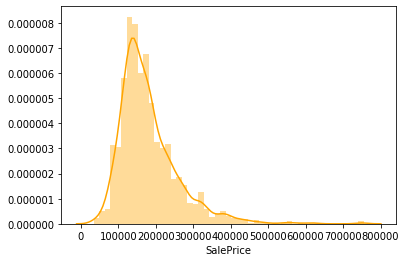

In [13]:
sns.distplot(train['SalePrice'], color="orange")

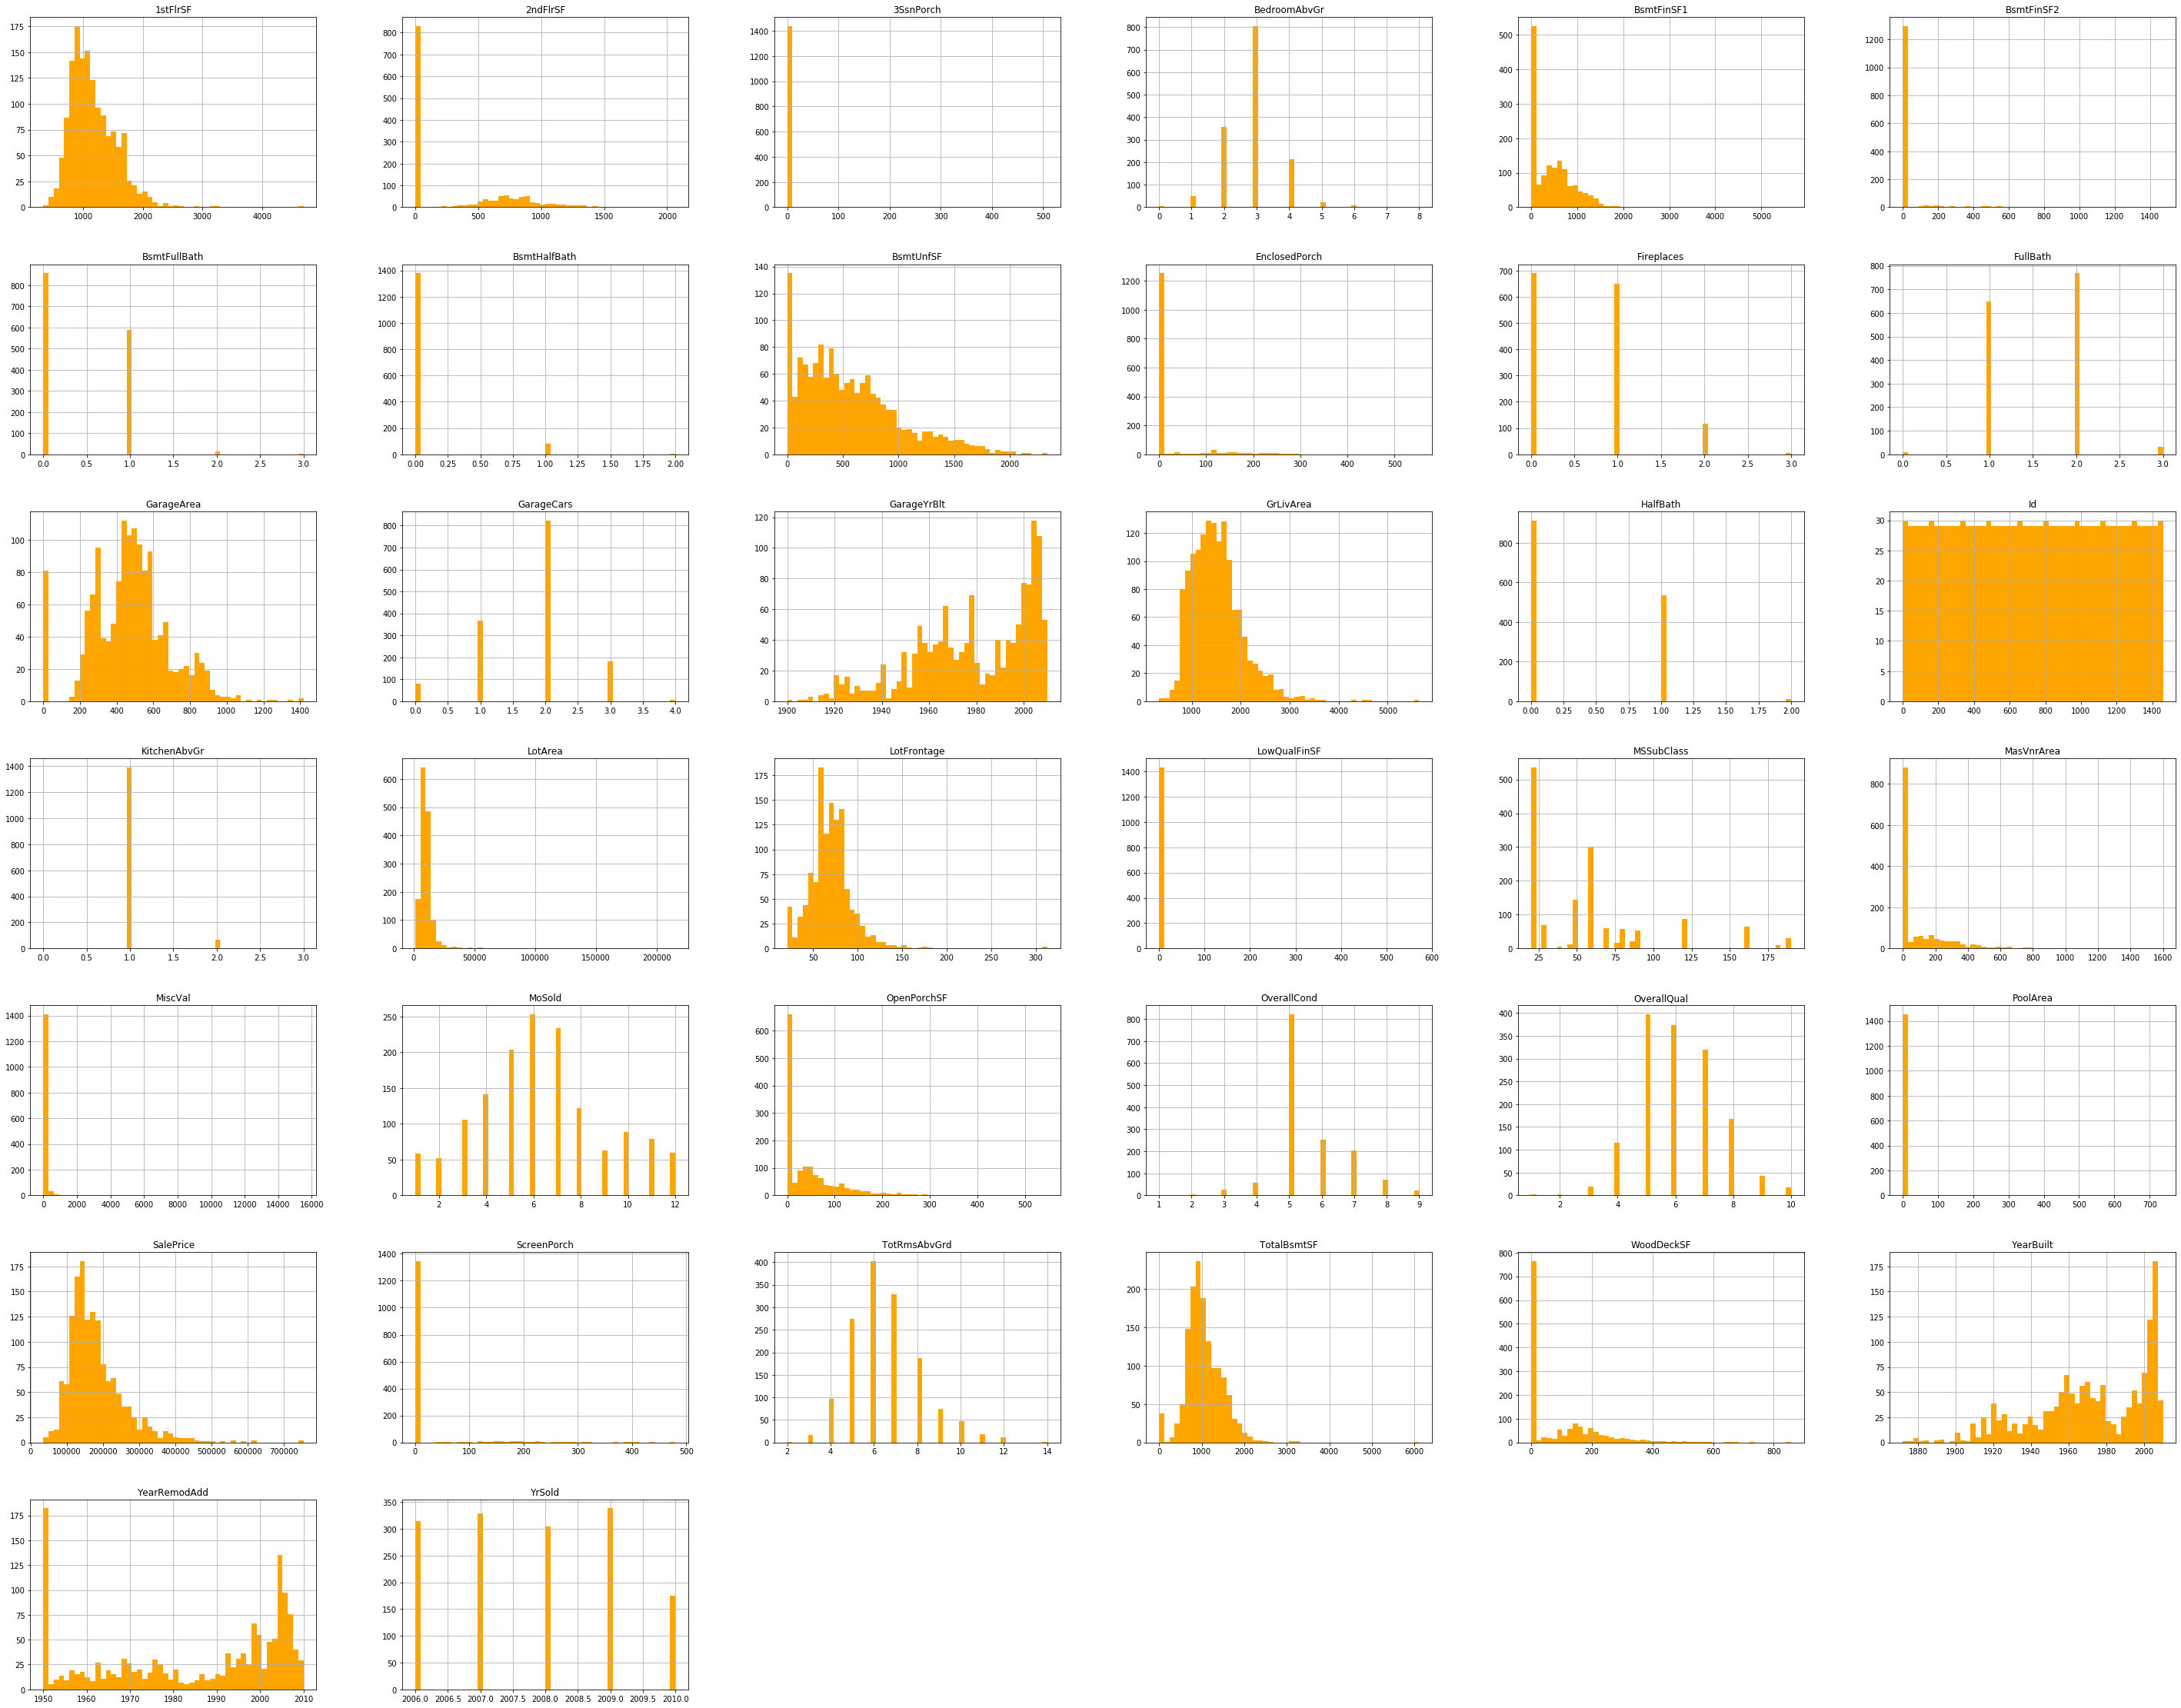

In [14]:
train.hist(bins=50, figsize=(50,40), color="orange")
plt.show()

Vi ser at "MSSubClass", "OverallQuall", "OverallCond", "MoSold" og "YrSold" er diskrete fordelinger og hvis vi ser nærmere i data_description.pdf (se fil i ./data), kan vi se at dette er kategoriske variabler. Disse må håndteres senere.

### Korrelasjonsmatrise
Vi ser nærmere på korrelasjoner i datasettet:

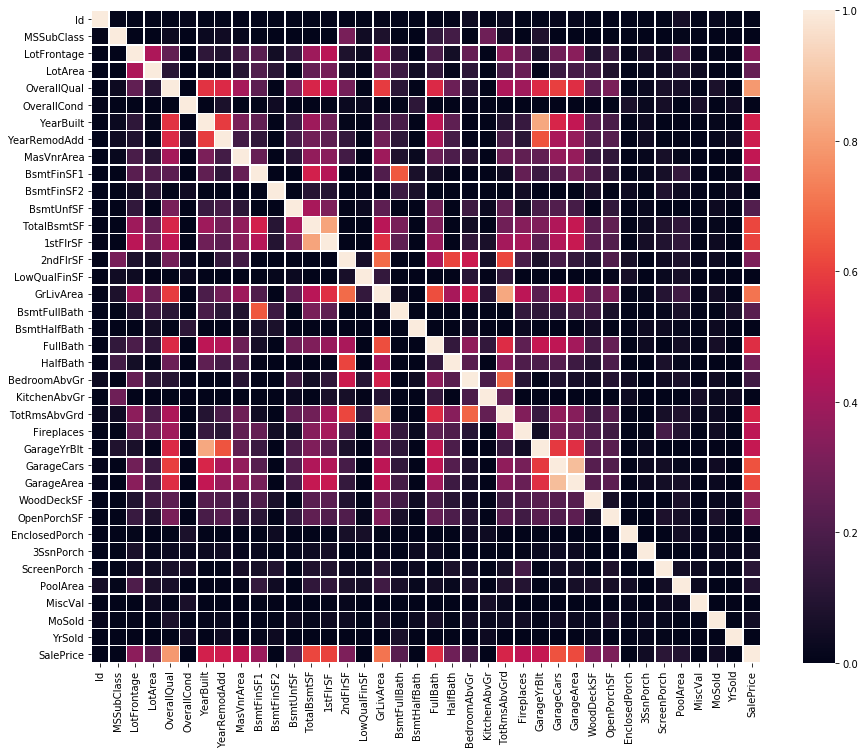

In [15]:
fig, ax = plt.subplots(figsize=(15, 12))
corr = train.corr()
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1)

Rutene som er lysest (bortsett fra de som har korrelasjon lik 1), er korrelasjoner som er viktige og noe vi må se nærmere på. Vi lager derfor en korrelasjonsmatrise opp mot "SalePrice", slik at vi ser hvilke som korrelerer mest med den.

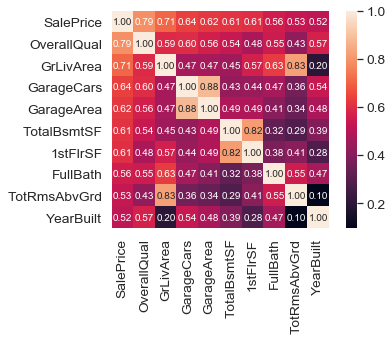

In [16]:
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Figuren viser variablene som korrelerer mest til "SalePrice". Det vi kan se ut i fra figuren er at "OverallQual", "GrLivArea" og "TotalBsmtSF" er sterkt korrelert til "SalePrice". "GarageCars" og "GarageArea" er også sterkt korrelert til hverandre. Grunnen til dette er at har du større garasje har du plass til flere biler. Derfor kan vi forholde oss til en av disse variablene.

Ut i fra dette vil følgende variabler ha en sentral rolle i dette problemet:
- OverallQual
- GarageCars
- YearBuilt
- FullBath
- TotalBsmtSF
- GrLivArea

### Lineære relasjoner
Vi ønsker å se nærmere på de linære relasjonene, og den beste måten å gjøre dette er ved å visualisere den linære relasjonen.

In [17]:
train.iplot(kind='scatter', x='GrLivArea', y='SalePrice', mode='markers', title='GrLivArea VS SalePrice', xTitle='GrLivArea', yTitle='SalePrice', size=10)

Vi ser en tydelig lineær relasjon mellom "GrLivArea" og "SalePrice". "GrLivArea" over 4000 er uteliggende data (outliners), og dette fjerner vi.

In [18]:
train.drop(train[train.GrLivArea>4000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [19]:
train.iplot(kind='scatter', x='TotalBsmtSF', y='SalePrice', mode='markers', title='TotalBsmtSF VS SalePrice', xTitle='TotalBsmtSF', yTitle='SalePrice', size=10)

Vi kan også se en tydelig lineær relasjon mellom "TotalBsmtSF" og "SalePrice". "TotalBsmtSF" etter 3000 er også outliners, så dette fjerner vi. Det er en del data på 0 "TotalBsmtSF", dette kan skyldes areal som ikke regnes som "grunn areal" eller lignende, uansett må det være med videre.

In [20]:
train.drop(train[train.TotalBsmtSF>3000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [21]:
train.iplot(kind='scatter', x='YearBuilt', y='SalePrice', mode='markers', title='YearBuilt VS SalePrice', xTitle='YearBuilt', yTitle='SalePrice', size=10)

Det er også en tydelig lineær relasjon mellom "YearBuilt" og "SalePrice", noe som tyder på inflasjonsøkning og at husenets verdi stiger med årene. "YearBuilt" før 1900-tallet er lite relevant, da det ikke er mye data - derfor behandler vi disse som outliners og dropper disse.

In [22]:
train.drop(train[train.YearBuilt<1900].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [23]:
train.iplot(kind='scatter', x='GarageCars', y='SalePrice', mode='markers', title='GarageCars VS SalePrice', xTitle='GarageCars', yTitle='SalePrice', size=10)

In [24]:
train.iplot(kind='scatter', x='OverallQual', y='SalePrice', mode='markers', title='OvarallQual VS SalePrice', xTitle='OverallQual', yTitle='SalePrice', size=10)

In [25]:
train.iplot(kind='scatter', x='FullBath', y='SalePrice', mode='markers', title='Fullbath VS SalePrice', xTitle='Fullbath', yTitle='SalePrice', size=10)

**Refleksjoner:**
- Det vi ser er at 'GrlivArea' og 'TotalBsmtSF' er i lineær relasjon med 'SalePrice'. Begge relasjonene er positiv som betyr at når en variabel øker, så vil den andre også øke. 
- 'OverallQual', 'FullBath' og 'YearBuilt' ser vi også er i relasjon med 'SalePrice'.  Den som skiller seg mest ut i dette tilfellet er 'OverallQual'

## 3 Håndtering av manglende verdier <a name="mangler"></a>
I dette avsnittet tar vi for oss de manglende verdiene. I første omgang ville det vært lettest og fjerne verdier som nesten bare inneholder NaN (not a number), men vi la merke til at dette også hadde en verdi. De vanligste metodene for å håndtere manglende verdier er mean, median eller mode, avhengig av distribueringen og variablene (kategorisk eller numerisk). For de kategoriske anvender vi mode, mens for de numeriske anvender vi mean. For de verdiene med skjev fordeling, anvender vi meadienen.

Det kan være noen ulemper ved bruk av gjennomsnitt, medianen eller mode når man skal håndtere de manglende verdiene. Dette kan introdusere skjevheter i antall manglende verdier. For å løse dette, kan vi gruppere datatene våre med variabler som har ingen manglende verdier og for hvert subset kan vi regne ut medianen for å håndtere de manglende verdiene av en variabel.

Vi begynner med å seperarere måldataen ("SalePrice") fra treningssettet. Deretter dropper vi "SalePrice" fra treningssettet. Vi lager en ny tabell (df_merged) som er en sammenslåing av train- og testsettet.

In [26]:
y_train = train.SalePrice

train.drop('SalePrice', axis = 1, inplace = True)

df_merged = pd.concat([train, test], axis = 0)

df_merged.shape

(2897, 80)

Håndterer kategoriske variabler:

In [27]:
df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

df_merged.dtypes.value_counts()

object     48
int64      21
float64    11
dtype: int64

Vi visualiserer manglende data i en heatmap, for å få oversikt over hvor mye som faktisk mangler:

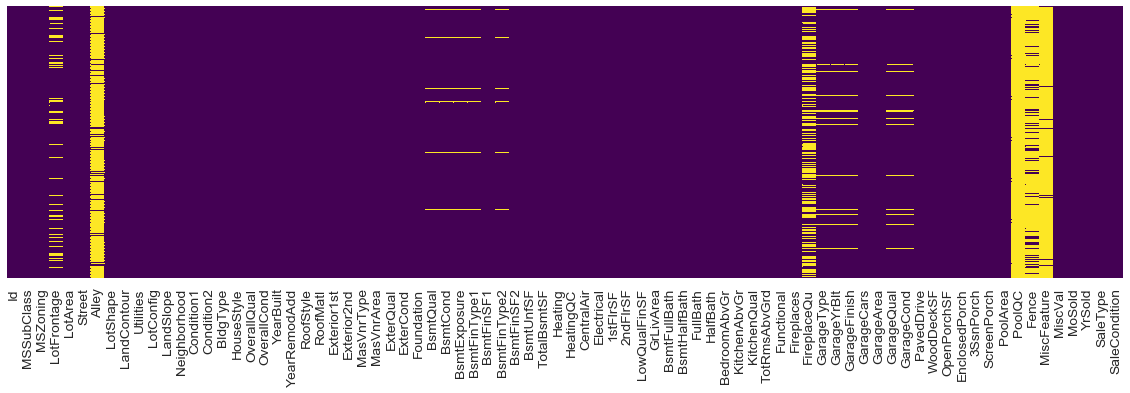

In [28]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_merged.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Som vi ser i figuren over er det en god del data som mangler eller har verdien NaN (Not a number), så derfor må dette håndteres. Vi tar derfor å skriver ut alle disse radene, slik at vi får en bedre oversikt over hva som må behandles.

In [29]:
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()

x = missing_columns.index
y = missing_columns

In [30]:
missing_columns

MSZoning           4
LotFrontage      485
Alley           2705
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      79
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1410
GarageType       155
GarageYrBlt      157
GarageFinish     157
GarageCars         1
GarageArea         1
GarageQual       157
GarageCond       157
PoolQC          2889
Fence           2331
MiscFeature     2793
SaleType           1
dtype: int64

Vanligvis pleier man å droppe variabler hvor vi mangler minst 40% av verdiene. 

I dette tilfellet er NaN-verdiene brukt med vilje for å beskrive visse ting, som for eksempel at NaN i Alley betyr No Alley Access.

For å unngå å droppe variabler som kan ha en betydning, gjør vi om NaN til None. For de kategoriske anvender vi "mode" og for de numeriske anvender vi "median". 

In [31]:
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [32]:
to_impute_by_mode =  df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [33]:
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

In [34]:
df = df_merged.drop(columns=['Id','LotFrontage'], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) 
df.head(2)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,617,1,1,3,3,0,4,0,...,0,0,3,4,1,0,1,2,8,4
1,0,3,892,1,1,3,3,0,2,0,...,0,0,3,4,1,0,4,1,8,4


**HVA GJØR VI HER?**

In [35]:
df['LotFrontage'] = df_merged['LotFrontage']

df = df.set_index('LotFrontage').reset_index()
df.head(2)

,LotFrontage,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,65.0,5,3,617,1,1,3,3,0,4,...,0,0,3,4,1,0,1,2,8,4
1,80.0,0,3,892,1,1,3,3,0,2,...,0,0,3,4,1,0,4,1,8,4


In [36]:
corr = df.corr()

display(corr['LotFrontage'].sort_values(ascending = False)[:5])
display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

LotFrontage    1.000000
LotArea        0.639965
1stFlrSF       0.420257
GarageArea     0.360497
GrLivArea      0.347875
Name: LotFrontage, dtype: float64

LotConfig    -0.191054
GarageType   -0.295651
MSSubClass   -0.398100
BldgType     -0.486039
Utilities          NaN
Name: LotFrontage, dtype: float64

Vi ser at BldgType har den høyeste korrelasjonen med LotFrontage.

In [37]:
df_merged['LotFrontage'] = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

Til slutt sjekker vi om vi har flere verdier som ikke er behandlet:

In [38]:
print('Manglende verdier som ikke er behandlet: ', df_merged.columns[df_merged.isna().any()].values)

Manglende verdier som ikke er behandlet:  []


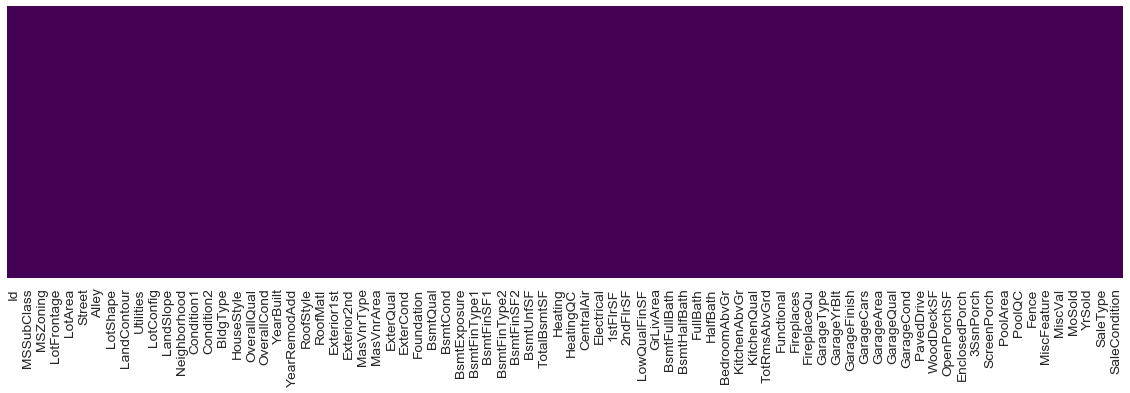

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_merged.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 4 Normalitet og transformasjon av distribusjoner<a name="normalitet"></a>

Normal distribusjon av variabler er ikke bare en av forutsetningene for regresjonsproblemer, men også en antagelse om parametrisk test og pearsons korrelasjon. I praksis kan ikke dette oppfylles perfekt og derfor er noe avvik fra denne antakelsen akseptabelt. Videre skal vi prøve å gjøre den skeive fordelingen så normal som mulig. Siden de fleste av variablene er positivt skjevt, skal vi bruke loggtransformasjon på dem. La oss observere målvariabelen hver for seg:

Hvis skeivhet er 0, er dataene perfekt symmetriske, selv om det er ganske usannsynlig for data fra den virkelige verden. Som en generell tommelfingerregel:

Hvis skeivheten er mindre enn -1 eller større enn 1, er fordelingen svært skjev. Hvis skeivheten er mellom -1 og -0,5 eller mellom 0,5 og 1, er fordelingen moderat skjev. Hvis skeivheten er mellom -0,5 og 0,5, er fordelingen omtrent symmetrisk. 

Kurtoseverdien er et mål på hvordan fordelingen er spredt mellom endepunktene. I et histogram over en diskret sannsynlighetsfordeling er kurtoseverdien et mål på "spissheten" til fordelingen. En normalfordeling har en kurtoseverdi på 3, hvis det er høyere enn dette sies det å ha en "eksess kurtose". Dette vil si at det er større sannsynlighet for at ekstreme verdier inntreffer.

In [40]:
print("Skeivhet: %f" % y_train.skew())
print("Kurtoseverdi: %f" % y_train.kurt())

Skeivhet: 1.529700
Kurtosis: 3.801796


In [41]:
y_train.iplot(kind='hist', bins=60)

In [42]:
y_train = np.log(y_train)
y_train.iplot(kind='hist', bins=60)

Nå kan vi kalkulere resten av de forklarende variablene.

In [43]:
skew_num = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])

skew_num_sorted = skew_num.sort_values(ascending = False, by = 'Skewness')
skew_num_sorted

,Skewness
MiscVal,21.881799
PoolArea,18.653165
LotArea,13.135552
LowQualFinSF,12.515094
3SsnPorch,11.338027
KitchenAbvGr,4.250236
BsmtFinSF2,4.153746
EnclosedPorch,4.066188
ScreenPorch,3.930502
BsmtHalfBath,3.930474


Tar ut numeriske variabler fra det samlede datasettet

In [44]:
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

Så gjennomfører vi en transformasjon av forklarende verdier:

In [45]:
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew() > 0.5].index])

df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew() < 0.5].index]
    
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

Til slutt oppdaterer vi de numeriske variablene med transformerte variabler:

In [46]:
df_merged_num.update(df_merged_num_all)

## 5 Feature Engineering <a name="feature"></a>

### Feature Scaling

I sklearn har vi flere metoder som for eksempel MinMaxScaler, minmax_scale, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer etc.

Funksjonskalering hjelper gradient-nedstigning til å konvergere raskere og reduserer treningstiden. Det er ikke nødvendig å standardisere mål-variabelen. På grunn av tilstedeværelsen av outliers vil vi imidlertid bruke sklearns RobustScaler siden det ikke påvirkes av outliers.

In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(df_merged_num)

df_merged_num_scaled = scaler.transform(df_merged_num)

In [48]:
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)

Vi må kode kategoriske variabler for maskinlæringsalgoritmer for å tolke dem. Vi vil bruke label encoding og deretter one hot encoding. Det første vi gjør er å tar ut de kategoriske veriablene og gjør de om til kategorier.

In [ ]:
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

Vi encoder kategoriske (ordinale) variabler for å preservere deres ordinalitet. Hvis vi bruker label encoding fra sklearn - vil det bli en tilfeldig encoding av disse ordinale variablene og derfor vil ordinalitet bli tapt. For å unngå dette, bruker vi pandas erstatningsmetode for å manuelt encode ordinal variablene. 

Her kommer data_description.pdf til nytte.

In [49]:
df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

Alle de behandlede variablene har type int64 dtype bortsett fra OverallQual og OverallCond, så disse konverterer vi til int 64. 

In [50]:
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

One hot encodings kategoriske variabler uten iboende rekkefølge vil vli konvertert til numeriske for modellen vår, ved hjelp av pandas get_dummies metoden.

In [51]:
df_merged_one_hot = df_merged_cat.select_dtypes(include=['category'])

df_merged_one_hot = pd.get_dummies(df_merged_one_hot, drop_first=True)

Nå må vi slå sammen one hot encoded og label encoded variablene sammen.

Deretter sluttet vi sammen behandlede kategoriske og numeriske variabler.

In [52]:
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis=1)
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis=1)

Vi kan nå sjekke dimensjonen av den nye datarammen.

In [53]:
df_merged_processed.shape

(2897, 224)

Nå kan vi hente train- og testdata for modellering. y_train er målvariabellen vår.

In [54]:
df_train_final = df_merged_processed.iloc[0:1438, :]
df_test_final = df_merged_processed.iloc[1438:, :]

y_train = y_train

Nå kan vi sjekke begge datasettene om de er lik i antall kolonner og rekker.

In [55]:
df_train_final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,-1.007539,-0.282415,-0.252720,0.638298,0.256410,1.034716,0.097744,0.0,-0.868727,-0.290107,...,4,2,6,0,2,3,3,2,0,0
1,-1.006854,0.509600,0.040019,0.063830,-0.435897,0.000000,0.147083,0.0,-0.377642,0.495238,...,4,1,6,3,2,3,3,2,0,0
2,-1.006169,-0.110504,0.403904,0.595745,0.230769,0.997612,0.041239,0.0,-0.050728,-0.144256,...,4,2,6,3,2,3,3,2,0,0
3,-1.005483,-0.587089,0.028038,-1.234043,-0.589744,0.000000,-0.081293,0.0,0.117866,-0.541370,...,4,2,6,4,1,3,3,2,0,0
4,-1.004798,0.696015,0.947867,0.574468,0.179487,1.147836,0.086395,0.0,0.042894,0.298374,...,4,2,6,3,2,3,3,2,0,0


In [56]:
df_test_final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,-0.006854,0.509600,0.478542,-0.255319,-0.820513,0.000000,0.035531,4.976734,-0.416583,-0.229583,...,4,1,6,0,1,3,3,2,0,3
1,-0.006169,0.557053,0.948993,-0.319149,-0.897436,0.918801,0.138319,0.000000,-0.102165,0.599913,...,4,2,6,0,1,3,3,2,0,0
2,-0.005483,0.211963,0.877618,0.510638,0.128205,0.000000,0.114953,0.000000,-0.938327,-0.126742,...,4,1,6,3,3,3,3,2,0,3
3,-0.004798,0.412911,0.128623,0.531915,0.128205,0.596270,0.073625,0.000000,-0.276105,-0.131106,...,4,2,6,4,3,3,3,2,0,0
4,-0.004112,-1.850496,-1.454234,0.404255,-0.025641,0.000000,-0.051576,0.000000,0.606606,0.523895,...,4,2,6,0,2,3,3,2,0,0


## 6 Maskinlæring<a name="maskinlæring"></a>

### Valg av modell
For at predikasjonene skal være best mulig, er valg av riktig modell viktig.

Vi begynner med å sette seed, slik at vi får samme output hver gang:

In [57]:
seed = 44

Vi henter inn de modellene vi er interessert i å teste.

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
lr = LinearRegression(n_jobs = -1)
dt = DecisionTreeRegressor(random_state = seed)
kn = KNeighborsRegressor(n_jobs = -1)
svr = SVR()
gbr = GradientBoostingRegressor(random_state = seed)

Trener deretter modellene våres og ser på hvilke som har best nøyaktighet for vår regresjonsmodell

In [102]:
def train(model):
    model.fit(df_train_final, y_train)
    return model.score(df_train_final, y_train)

models = [lr, dt, kn, svr, gbr]
training_score=[]
for model in models:
    training_score.append(train(model))   

/Users/sebastianberge/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [103]:
scores = pd.DataFrame(data = training_score, columns = ['Training_RSquared'])
scores.index = ['lr','dt', 'kn', 'svr', 'gbr']

In [105]:
scores = (scores*100).round(4)

In [106]:
scores

,Training_RSquared
lr,93.9347
dt,100.0000
kn,87.5095
svr,94.3883
gbr,95.7447


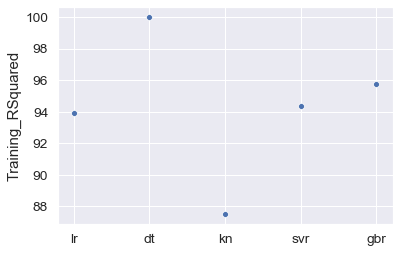

In [107]:
#Mulig vi ikke trenger figur, men her er et eksempel
sns.scatterplot(scores.index, scores['Training_RSquared'])

I dette tilfellet ønsker vi at tallet skal være så nærme 100 som mulig. Vi ser at DecisionTreeRegressor har verdien 100, som kan indikere "overfitting".

#### Evaluering av modellene

In [108]:
def split(model):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size=0.3, random_state=seed)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(pred, Y_test)
    rmse = np.sqrt(mse)
    return rmse

Bruker deretter funksjonen over for å kalkulere de forskjellige resultatene for de forskjellige modellene

In [109]:
models = [dt, kn, svr, gbr]
rmse_score = []
for model in models:
    rmse_score.append(split(model))

/Users/sebastianberge/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [110]:
scores_RMSE = pd.DataFrame(data = rmse_score, columns = ['RMSE'])
scores_RMSE.index = ['dt', 'kn', 'svr', 'gbr']

In [111]:
scores_RMSE

,RMSE
dt,0.191422
kn,0.174334
svr,0.118092
gbr,0.123626


RMSE ønsker vi skal være så lavt som mulig og i dette tilfellet kommer SVR best ut, mens LinearRegressor kommer veldig dårlig ut. 

#### K-Fold Cross validation

In [112]:
def cross_validation(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, df_train_final, y_train, cv=10, n_jobs= -1, scoring = 'neg_mean_squared_error')
    sq_val_score = np.sqrt(-1*val_score)
    r_val_score = np.round(sq_val_score, 5)
    return r_val_score.mean()

Bruker funksjonen over til å til å kalkulere cross validation resultatene til de forskjellige modellene

In [113]:
models = [dt, kn, svr, gbr]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validation(model))

Skriver ut resultatene

In [114]:
x_val_score = pd.DataFrame(data = cross_val_scores, columns=['Cross_Val_Score(RMSE)'])
x_val_score.index = ['dt', 'kn','svr', 'gbr']

In [115]:
x_val_score

,Cross_Val_Score(RMSE)
dt,0.190389
kn,0.174833
svr,0.116425
gbr,0.122386


Vi ser at SVR gjør det best i dette tilfellet også, så derfor tar vi utgangspunkt i denne og optimaliserer parametrene for denne

### Optimalisering av hyperparametre
Vi ønsker å finne de rette parametrene (som hvilke C og gamma verdier vi skal bruke). For å gjøre dette bruker vi Gridsearch, der vi lager et "Grid" av parametre og tester det ut på forskjellige mulige kombinasjoner. Denne metoden er innebygd i Scikit-learn som GridSearchCV, der CV står for cross-validation.

In [116]:
def hyperparameter(model, param_grid):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    
    grid = GridSearchCV(model, param_grid, cv=10, scoring= 'neg_mean_squared_error', n_jobs = -1)
    grid.fit(df_train_final, y_train)
    best_params = grid.best_params_
    best_score = np.round(np.sqrt(-1*grid.best_score_), 5)
    return best_params, best_score

#### Optimalisering av GBR

In [120]:
gbr_params_grid = {'n_estimators': [5, 10],
                  'min_samples_split': [2],
                  'min_samples_leaf': [2, 4],
                  'random_state': [seed],
                  'max_depth': [3, 4]}

hyperparameter(gbr, gbr_params_grid)
gbr_best_params, gbr_best_score = best_params, best_score
print('GBR best params:{} & best_score:{:0.5f}' .format(gbr_best_params, gbr_best_score))

GBR best params:{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 44} & best_score:0.21217


Vi testet å optimalisere GradientBoostingRegressor, men i forhold til SVR kommer denne dårligere ut. Vi bruker derfor ikke denne videre til submission. 
#### Optimalisering av SVR

In [133]:
svr_params_grid = {'kernel':['linear', 'poly', 'rbf'],
                   'C':[2,4,5],
                   'gamma':[0.01,0.001,0.0001]}
hyperparameter(svr, svr_params_grid)
svr_best_params, svr_best_score = best_params, best_score
print('SVR best params:{} & best_score:{:0.5f}' .format(svr_best_params, svr_best_score))

SVR best params:{'C': 6, 'gamma': 0.001, 'kernel': 'rbf'} & best_score:0.11313


### Trener modellen på nytt med hyperparametre

In [134]:
svm_opt = SVR(**svr_best_params)

In [135]:
svm_opt.fit(df_train_final, y_train)

SVR(C=6, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [137]:
y_pred = np.expm1(svm_opt.predict(df_test_final))

In [138]:
submission = pd.DataFrame()
submission['Id']= test.Id
submission['SalePrice'] = y_pred

In [139]:
submission

,Id,SalePrice
0,1461,117973.585700
1,1462,157151.855655
2,1463,180936.531435
3,1464,195427.190353
4,1465,191851.528533
5,1466,160709.606695
6,1467,163168.656391
7,1468,160654.982614
8,1469,185008.613456
9,1470,117711.016345


In [141]:
submission.to_csv('submission.csv', index=False)